## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [4]:
df = pd.read_csv('distance_dataset (1).csv')
df.head()

,Unnamed: 0,X,Y,Z,ClusterID
0,0,5.135779,4.167542,5.787635,4
1,1,4.280721,5.770909,6.091044,4
2,2,8.329098,7.540436,3.247239,2
3,3,5.470224,5.069249,5.768313,4
4,4,2.381797,2.402374,3.879101,1


### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [5]:
matYZ=np.array(df[['X','Y']])
mat=np.array(df[['X','Y','Z']])


Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [6]:
simCosine3D = 1. - cosine_similarity(mat, [[5,5,5]], 'cosine')
simCosine = 1. - cosine_similarity(matYZ, [[5,5]], 'cosine')

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

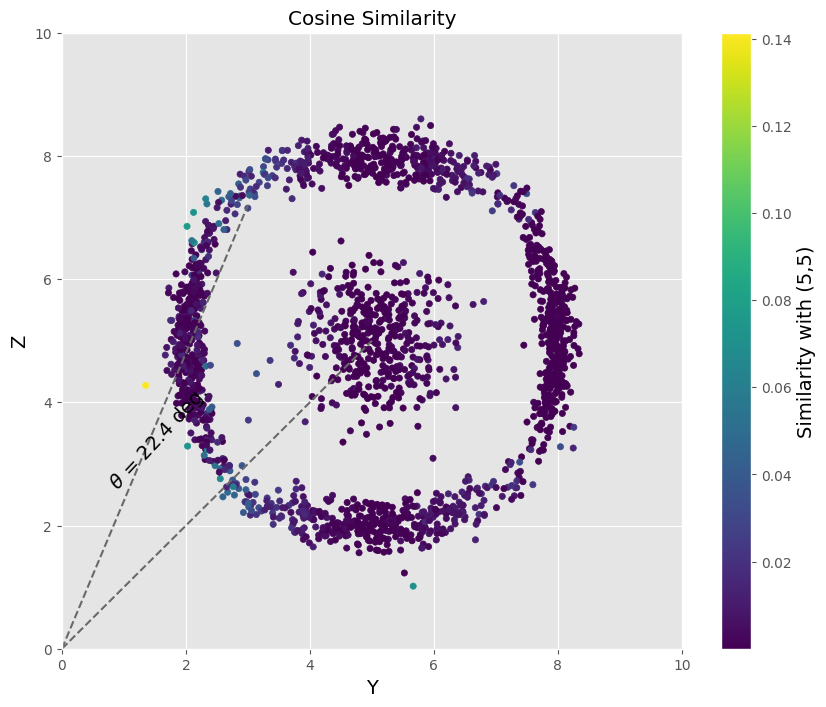

In [7]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

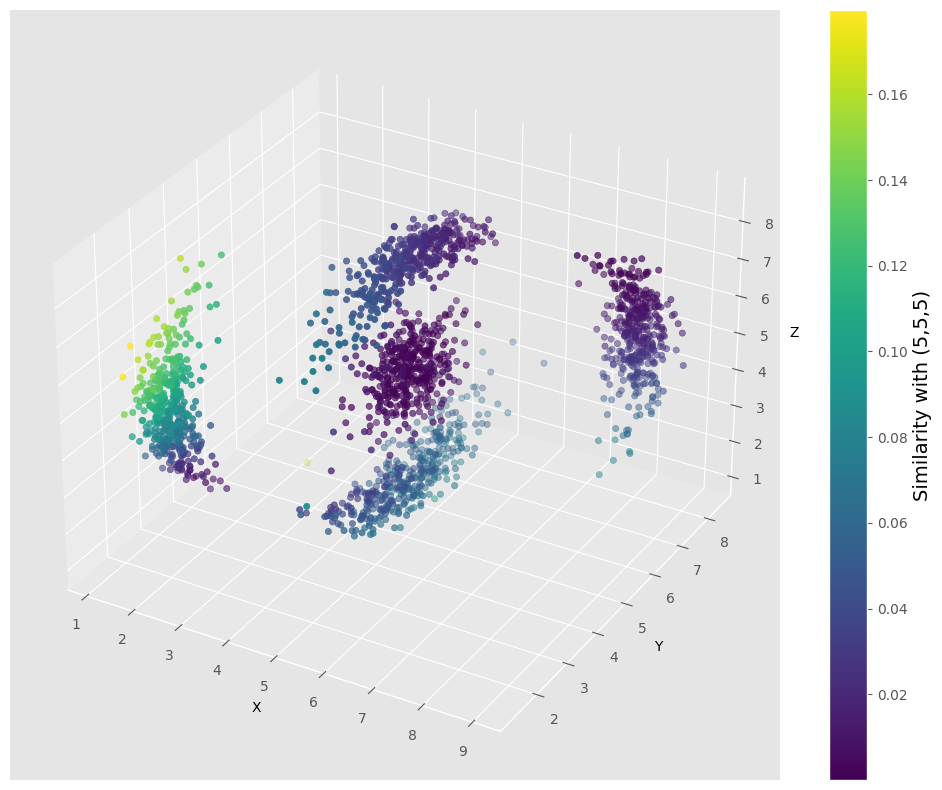

In [8]:
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(mat[:,0], mat[:,1], mat[:,2], c=simCosine3D[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.vocabulary_.keys(),index=['Document 0','Document 1'])

,starbucks,coffee,essence,of
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.vocabulary_.keys(),index=['Document 0','Document 1'])

,starbucks,coffee,essence,of
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [13]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [19]:
Document0='Rafael Nadal Parera (Catalan, Spanish;[6] born 3 June 1986) is a Spanish professional tennis player. He is currently ranked world No. 13 in singles by the Association of Tennis Professionals (ATP).[1] He has been ranked world No. 1 for 209 weeks, and has finished as the year-end No. 1 five times. He also holds the record for most consecutive weeks in the Top 10 of the ATP Rankings, having never left the Top 10 from April 2005 to March 2023, a total of 912 weeks. Nadal has won a joint-record 22 Grand Slam mens singles titles, including a record 14 French Open titles. He has won 92 ATP singles titles, including 36 Masters titles, with 63 of these on clay courts. Nadal is one of only two men to complete the Career Golden Slam in singles.[b] His 81 consecutive wins on clay is the longest single-surface win streak in the Open Era.'
Document1='Roger Federer (German: born 8 August 1981) is a Swiss former professional tennis player. He was ranked world No. 1 by the Association of Tennis Professionals (ATP) for 310 weeks, including a record 237 consecutive weeks, and finished as the year-end No. 1 five times. He won 103 singles titles on the ATP Tour, the second most of all time, including 20 major mens singles titles, a record eight mens singles Wimbledon titles, an Open Era joint-record five mens singles US Open titles, and a joint-record six year-end championships. In his home country, he is regarded as the greatest and most successful Swiss sportsperson in history.'
Document2='Michael Jeffrey Jordan (born February 17, 1963), also known by his initials MJ,[9] is an American former professional basketball player and businessman. His biography on the official National Basketball Association (NBA) website states: By acclamation, Michael Jordan is the greatest basketball player of all time.[10] He played fifteen seasons in the NBA, winning six NBA championships with the Chicago Bulls. Jordan is the principal owner and chairman of the Charlotte Hornets of the NBA and of 23XI Racing in the NASCAR Cup Series. He was integral in popularizing the basketball sport and the NBA around the world in the 1980s and 1990s,[11] becoming a global cultural icon.'
corpus = [Document0,Document1,Document2]

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [20]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)

 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [21]:
pd.DataFrame(X_train_counts.toarray(),columns=count_vect.vocabulary_.keys(),index=['Document 0','Document 1','Document 2'])

,rafael,nadal,parera,catalan,spanish,born,june,1986,is,professional,...,popularizing,sport,around,1980s,1990s,11,becoming,global,cultural,icon
Document 0,2,0,0,1,1,0,0,0,0,1,...,0,3,0,1,0,1,1,2,2,1
Document 1,0,1,0,0,0,0,0,0,1,0,...,0,2,1,0,0,0,0,1,1,2
Document 2,1,0,1,0,0,1,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [22]:
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.vocabulary_.keys(),index=['Document 0','Document 1', 'Document 2'])

,rafael,nadal,parera,catalan,spanish,born,june,1986,is,professional,...,popularizing,sport,around,1980s,1990s,11,becoming,global,cultural,icon
Document 0,0.103901,0.000000,0.000000,0.068309,0.068309,0.000000,0.000000,0.000000,0.000000,0.068309,...,0.000000,0.155852,0.000000,0.068309,0.000000,0.068309,0.051951,0.103901,0.080689,0.051951
Document 1,0.000000,0.092465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.092465,0.000000,...,0.000000,0.140644,0.092465,0.000000,0.000000,0.000000,0.000000,0.070322,0.054611,0.140644
Document 2,0.056229,0.000000,0.073934,0.000000,0.000000,0.073934,0.073934,0.073934,0.000000,0.000000,...,0.073934,0.000000,0.000000,0.000000,0.073934,0.000000,0.056229,0.000000,0.043667,0.000000


 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [29]:
cosine_similarity(trsfm[0:3], trsfm)

array([[1.        , 0.58049349, 0.33231409],
       [0.58049349, 1.        , 0.30348706],
       [0.33231409, 0.30348706, 1.        ]])

To see how the cosine similarity works with 3 documents, I add three different documents: 1 about Roger Federer, 1 about Rafael Nadal, and 1 about Michael Jordan. As expected, the articles about Federer and Nadal were more similar.